# Artificial Intelligence Course - Fall 1402
## Computer Assignment #2 - Reinforcement Learning

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 8:](#2-1)
    - [َQuestion 9:](#2-2)
    - [َQuestion 10:](#2-3)

In [1]:
# import
import numpy as np
import gym
import time
import tkinter as tk
import matplotlib.pyplot as plt

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode = "human", is_slippery=False)

In [3]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.reset()
env.render()

you can see the environment in each step by render command :


In [4]:
# Total no. of states
env.observation_space.n

16

In [5]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

Value iteration is used in reinforcement learning and it is a dynamic programming algorithm and used to find optimal value and policy for MDP. In this algorithm we iterate each state and find the action that maximize the value of the state. The value of each state: v(s) = max(a) (sum (p(s,a,s') * (r(s,a,s') + gama * v(s')))). We repeat that until valus converage to a optimal value and find that if difference of values if a state is less than a threshold.

<a name='1-1'></a>
### Question 2:

In [6]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))

    def value_estimation(self):
        self.delta = np.inf

        while(self.delta > self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        ### START CODE HERE ###
                         action_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                        ### END CODE HERE ###
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

                if (self.delta < self.theta):
                    break

    def take_action(self, action):
        next_state, reward, done, _, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-12'></a>
### Question 3:

Policy iteration is used in reinforcement learning and it is a dynamic programmming algorithm. It si used to find an optimal policy for MDP. It has two part: 1- policy evaluation: In this part we evaluate values for a fixed policy. 2- Policy improvment: In this part we update policy according to values for each state we select the acetion that maximize the value. We repeat that until the policy doesn't change.

<a name='1-2'></a>
### Question 4:

In [7]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False

    def policy_evaluation(self):
        self.delta = np.inf

        while(self.delta >= self.theta):

            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    ### START CODE HERE ###
                    new_state_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                    ### END CODE HERE ###
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    ### START CODE HERE ###
                    action_value += probability * (reward + (self.discount_factor * self.state_values[next_state]))
                    ### END CODE HERE ###
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False

        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()

    def take_action(self, action):
        next_state, reward, done, _, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-3'></a>
### Question 5:

<a name='1-3-1'></a>
#### Value Iteration:

In [8]:
df = 0.9
episode_number = 100

s1 = ValueIteration (env, df)

total_time = 0

for i in range (episode_number):
    s1 = ValueIteration (env, df)
    s1.reset ()
    start_time = time.time ()
    s1.value_estimation ()
    finish_time = time.time ()
    total_time = total_time + (finish_time - start_time)

d1 = total_time / episode_number
print ("time1: ", d1)

action = s1.get_optimal_policy (0)

env.reset ()
env.render ()

while True:
    next_state,reward,done = s1.take_action (action)
    action = s1.get_optimal_policy (next_state)
    env.render ()
    time.sleep (1)
    
    if  done:
        break

state_values = s1.get_state_values ()
q_values = s1.get_q_values ()
print (q_values)

rows_num = 4
cols_num = 4

window1 = tk.Tk ()
window1.title ("State Values")

for i in range (rows_num):
    for j in range (cols_num):
        index = (4 * i) + j
        text_value = str (state_values[index])
        cell = tk.Label (window1, text = text_value, bg = "yellow")
        cell.grid (row = i, column = j, padx = 10, pady = 10)

window1.mainloop ()


actions = []
for i in range (16):
    action = s1.get_optimal_policy (i)
    
    if (action == 0):
        a = "←"
    elif (action == 1):
        a = "↓"
    elif (action == 2):
        a = "→"
    else:
        a = "↑"
    
    actions.append (a)

window2 = tk.Tk ()
window2.title ("Policy")

for i in range (rows_num):
    for j in range (cols_num):
        index = (4 * i) + j
        text_value = actions[index]
        cell = tk.Label (window2, text = text_value, bg = "yellow")
        cell.grid (row = i, column = j, padx = 10, pady = 10)

window2.mainloop ()

time1:  0.0039538717269897465


C:\Users\Mohammad Reza\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.13286025 0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.13286025 0.59049    0.59049   ]
 [0.59049    0.6561     0.13286025 0.531441  ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.11957423 0.81       0.13286025 0.6561    ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.6561     0.13286025 0.729      0.59049   ]
 [0.6561     0.81       0.81       0.11957423]
 [0.729      0.9        0.13286025 0.729     ]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.13286025 0.13286025 0.13286025 0.13286025]
 [0.11957423 0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


<a name='1-3-2'></a>
#### Policy Iteration:

In [9]:
df = 0.9
episode_number = 100

s2 = PolicyIteration (env, df)

total_time = 0
for i in range (episode_number):
    s2 = PolicyIteration (env, df)
    s2.reset ()
    start_time = time.time ()
    s2.policy_estimation ()
    finish_time = time.time ()
    total_time = total_time + (finish_time - start_time)

d2 = total_time / episode_number
print ("time2: ", d2)

action = s2.get_optimal_policy (0)

env.reset ()
env.render ()

while True:
    next_state,reward,done = s2.take_action (action)
    action = s2.get_optimal_policy (next_state)
    env.render ()
    time.sleep (1)
    
    if  done:
        break

state_values = s2.get_state_values ()
q_values = s2.get_q_values ()
print (q_values)

rows_num = 4
cols_num = 4

window1 = tk.Tk ()
window1.title ("State Values")

for i in range (rows_num):
    for j in range (cols_num):
        index = (4 * i) + j
        text_value = str (state_values[index])
        cell = tk.Label (window1, text = text_value, bg = "yellow")
        cell.grid (row = i, column = j, padx = 10, pady = 10)

window1.mainloop ()


actions = []
for i in range (16):
    action = s2.get_optimal_policy (i)
    
    if (action == 0):
        a = "←"
    elif (action == 1):
        a = "↓"
    elif (action == 2):
        a = "→"
    else:
        a = "↑"
    
    actions.append (a)

window2 = tk.Tk ()
window2.title ("Policy")

for i in range (rows_num):
    for j in range (cols_num):
        index = (4 * i) + j
        text_value = actions[index]
        cell = tk.Label (window2, text = text_value, bg = "yellow")
        cell.grid (row = i, column = j, padx = 10, pady = 10)

window2.mainloop ()

time2:  0.031020586490631104
[[5.31441000e-01 5.90490000e-01 5.90490000e-01 5.31441000e-01]
 [5.31441000e-01 2.24536249e-08 6.56100000e-01 5.90490000e-01]
 [5.90490000e-01 7.29000000e-01 5.90490000e-01 6.56100000e-01]
 [6.56100000e-01 2.24536249e-08 5.90490000e-01 5.90490000e-01]
 [5.90490000e-01 6.56100000e-01 2.24536249e-08 5.31441000e-01]
 [2.24536249e-08 2.24536249e-08 2.24536249e-08 2.24536249e-08]
 [2.24536249e-08 8.10000000e-01 2.24536249e-08 6.56100000e-01]
 [2.24536249e-08 2.24536249e-08 2.24536249e-08 2.24536249e-08]
 [6.56100000e-01 2.24536249e-08 7.29000000e-01 5.90490000e-01]
 [6.56100000e-01 8.10000000e-01 8.10000000e-01 2.24536249e-08]
 [7.29000000e-01 9.00000000e-01 2.24536249e-08 7.29000000e-01]
 [2.24536249e-08 2.24536249e-08 2.24536249e-08 2.24536249e-08]
 [2.24536249e-08 2.24536249e-08 2.24536249e-08 2.24536249e-08]
 [2.24536249e-08 8.10000000e-01 9.00000000e-01 7.29000000e-01]
 [8.10000000e-01 9.00000000e-01 1.00000000e+00 8.10000000e-01]
 [0.00000000e+00 0.0000000

<a name='1-4'></a>
### Question 6:

Both algorithm converge to the optimal policy and both give us same policy and state values. Policy iteration is faster than value iteration and converge faster because it fixes a policy and calaulate values base on that and improve the policy. But here because the problem is simple both algorithms are almost same and converge fast.

<a name='1-4-1'></a>
#### Value Iteration:

<a name='1-4-2'></a>
#### Policy Iteration:

<a name='2'></a>
## Part 2: Q-Learning Algorithm

### Question 7

Q-learning algorithm is a reinforcement learning algorithm and it is used to solve MDP to find optimal policy by. It estimate value of each state-action. Agent can decide explore or exploit. Exploration means take a random action to discover. Exploitaion means take an action based on estimated Q-values. It will converage to the optimal policy.

In [10]:
# hyperparameters
REPS = 1
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 253

In [11]:
# environment
env = gym.make('Taxi-v3')
#env.seed(seed = STUDENT_NUM)
Initial_State = env.reset()[0]
Initial_State

351

In [12]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(Initial_State)
taxi_row, taxi_col, pass_idx, dest_idx

(3, 2, 2, 3)

In [13]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.render()

you can see the environment in each step by render command :


C:\Users\Mohammad Reza\AppData\Roaming\Python\Python311\site-packages\gym\envs\toy_text\taxi.py:282: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("Taxi-v3", render_mode="rgb_array")
  logger.warn(


AssertionError: Something went wrong with pygame. This should never happen.

In [ ]:
# Total no. of states
env.observation_space.n

In [14]:
# Total no. of actions
env.action_space.n

6

In [7]:
# base code for Q-learning

env = gym.make('Taxi-v3')
env.seed(seed = STUDENT_NUM)


for rep in range(REPS):
    agent = # Agent Object instance from Algorithm_name(e.g Q_learning_agent) class which has inherited from Agentbase.
    for episode in range(EPISODES):
        Initial_state = env.reset()

        for ... :

            bestAction = np.random.choice(ACTIONS)

            next_state,rew,done,_ = environment.step(bestAction)

            if done:
                break

SyntaxError: invalid syntax (2255913832.py, line 8)

<a name='2-1'></a>
### Question 8:

In [15]:
class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
        self.env = env
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.olr = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
        self.seed = seed

    def choose_action(self, state):
      ### START CODE HERE ###
      # With probability epsilon, choose a random action

      # Otherwise, choose the action with the highest Q-value
        random_number = np.random.rand ()
        
        if (random_number < self.epsilon):
            action = np.random.choice ([0, 1, 2, 3, 4, 5])
        else:
            action = np.argmax (self.q_table[state])

      ### END CODE HERE ###
        return action

    def update_q_table(self, state, action, nextState, reward):
      ### START CODE HERE ###
      # Calculate the new Q-value using the Q-learning formula
        self.q_table[state][action] = self.q_table[state][action] + self.learning_rate * (reward + self.discount_factor * np.max(self.q_table[nextState]) - self.q_table[state][action])
      ### END CODE HERE ###

    def decay_epsilon(self, episode):
      ### START CODE HERE ###
        self.epsilon = 1 / (episode + 1)
      ### END CODE HERE ###

    def decrease_learning_rate(self, episode):
      ### START CODE HERE ###
        self.learning_rate = 0.1 - 0.000045 * episode
      ### END CODE HERE ###

    def take_action(self, action):
        next_state, reward, done, _, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_table[state])

    def get_q_values(self):
        return self.q_table

    def reset(self):
      # self.learning_rate = self.olr
      return self.env.reset(seed=self.seed)
    
    def change_env (self, env):
        self.env = env

<a name='2-2'></a>
### Question 9:

In [16]:
total_rewards1 = []
for rep in range(REPS):
    rewards1 = []
    env = gym.make('Taxi-v3')
    agent1 = QLearningAgent (env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)
    for episode in range(EPISODES):
        initial_state = agent1.reset()[0]
        state = initial_state
        total_reward = 0
        done = False

        while True:
            action = agent1.choose_action (state)

            next_state,reward,done = agent1.take_action (action)
            agent1.update_q_table (state, action, next_state, reward)
            total_reward = total_reward + reward
            state = next_state

            if done:
                break
        rewards1.append (total_reward)
                
        agent1.decay_epsilon (episode)
        
    total_rewards1.append (rewards1)
    
    env = gym.make('Taxi-v3', render_mode = "human")
    agent1.change_env (env)
    
    state = agent1.reset ()[0]
    total_reward = 0
    done = False
    
    while True:
        env.render ()
        time.sleep (0.05)
        action = agent1.get_optimal_policy (state)
        next_state,reward,done = agent1.take_action (action)
        total_reward = total_reward + reward
        state = next_state
        
        if done:
            break
    print ("reward: ", total_reward)

reward:  5


In [18]:
total_rewards2 = []
for rep in range(REPS):
    env = gym.make('Taxi-v3')
    rewards2 = []
    agent2 = QLearningAgent (env, EPSILON, LEARNING_RATE, DISCOUNT, STUDENT_NUM)
    for episode in range(EPISODES):
        initial_state = agent2.reset()[0]
        state = initial_state
        total_reward = 0
        done = False

        while True:
            action = agent2.choose_action (state)

            next_state,reward,done = agent2.take_action (action)
            agent2.update_q_table (state, action, next_state, reward)
            total_reward = total_reward + reward
            state = next_state

            if done:
                break
        rewards2.append (total_reward)
                
        agent2.decay_epsilon (episode)
        agent2.decrease_learning_rate (episode)
        
    total_rewards2.append (rewards2)
    
    env = gym.make('Taxi-v3', render_mode = "human")
    agent2.change_env (env)
    
    state = agent2.reset ()[0]
    total_reward = 0
    done = False
    while True:
        env.render ()
        time.sleep (0.05)
        action = agent2.get_optimal_policy (state)
        next_state,reward,done = agent2.take_action (action)
        total_reward = total_reward + reward
        state = next_state
        if done:
            break
    print ("reward: ", total_reward)

reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5
reward:  5


<a name='2-3'></a>
### Question 10:

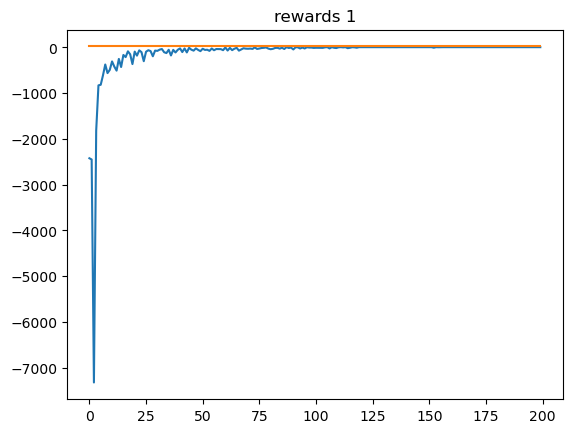

In [19]:
plt.plot (total_rewards1[0][:200])
plt.plot ([reward] * 200)
plt.title ("rewards 1")
plt.show ()

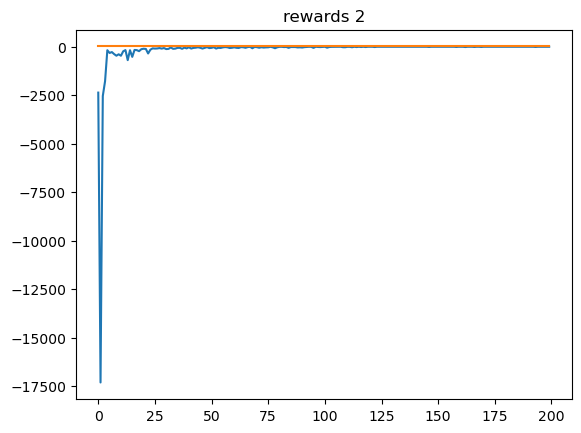

In [20]:
plt.plot (total_rewards2[0][:200])
plt.plot ([reward] * 200)
plt.title ("rewards 2")
plt.show ()

Both solutions converge to the optimal policy. But with decreasing learning_rate it converges faster (Here because the problem is simple and both converge fast it is not clear). Decreasing learning rate can help algoritm to converge more effectively and more stable. But it can also slow down the learing especially in compelex problems. With decreasing learning rate algorithm become more conservative and it helps to prevent from overfitting. We decrease epsilon: 1 / (episode + 1). Because it decrease as episode becomes grater and it has exponential form.